### Spotify Analysis
#### Sita Robinson

![](https://lh3.googleusercontent.com/proxy/1jPoAxdlqBzQ5SlIk7JL0X45i-vGP1twJUOOUYkYuhiEj2bqfZ5rYRygfMh-wMwC3AS1GD2lSvSkUCQ2ep4uv3oxYT4C5px8OA)

**Purpose**

* Analyzing personal data from the Spotify API to learn more about the music I listen to.

**Setup**

* In order to make requests using the Spotify API you first need to make sure you are logged into [Here](https://developer.spotify.com/dashboard/applications) and you "Create a New App".  Once created you should be able to see a Client ID and Client Secret which can be configured below. 

<hr>

Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)

Request Urls

In [3]:
CLIENT_ID = 'REPLACE WITH CLIENT_ID'
CLIENT_SECRET = 'REPLACE WITH CLIENT_ID_SECRET'
AUTH_URL = 'https://accounts.spotify.com/api/token'

#Endpoints
BASE_URL = 'https://api.spotify.com/v1/'
USER_ID = '22z4jf44h3ido2zznq5q3garq/'
PLAYLIST_ID = '3b6hKzYzFpCKxipAz3pAvr/'
USERS_ENDPOINT='users/'
PLAYLIST_ENDPOINT='playlists/'
TRACKS_ENDPOINT='tracks/'
IMAGES_ENDPOINT='images/'
PLAYER_ENDPOINT='player/'
DEVICES_ENDPOINT='devices/'
OFFSET_QUERY_PARAM='?offset='

In [4]:
USER_LINK=BASE_URL + USERS_ENDPOINT+ USER_ID
PLAYLIST_LINK=BASE_URL + USERS_ENDPOINT+ USER_ID+ PLAYLIST_ENDPOINT
SPECIFIC_PLAYLIST_LINK=BASE_URL + USERS_ENDPOINT + USER_ID+ PLAYLIST_ENDPOINT + PLAYLIST_ID
SPECIFIC_PLAYLIST_LINK_OFFSET=BASE_URL + USERS_ENDPOINT + USER_ID+ PLAYLIST_ENDPOINT + PLAYLIST_ID+ TRACKS_ENDPOINT[:-1]+ OFFSET_QUERY_PARAM + '100'
SPECIFIC_PLAYLIST_LINK_OFFSET_200=BASE_URL + USERS_ENDPOINT + USER_ID+ PLAYLIST_ENDPOINT + PLAYLIST_ID + TRACKS_ENDPOINT[:-1] + OFFSET_QUERY_PARAM + '200'
TRACK_LINK=BASE_URL+TRACKS_ENDPOINT
PLAYLIST_IMAGE_LINK=BASE_URL+PLAYLIST_ENDPOINT+PLAYLIST_ID+IMAGES_ENDPOINT

Requesting an access token

In [5]:
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

In [6]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

Getting a response from the user endpoint.  The id found here will be used in later requests and is referred to in the USER_ID variable.

In [7]:
user_endpoint_response = requests.get(USER_LINK, headers=headers)
user_endpoint_response.json()

{'display_name': 'Sita Robinson',
 'external_urls': {'spotify': 'https://open.spotify.com/user/22z4jf44h3ido2zznq5q3garq'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/users/22z4jf44h3ido2zznq5q3garq',
 'id': '22z4jf44h3ido2zznq5q3garq',
 'images': [{'height': None,
   'url': 'https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=1750546051826535&height=300&width=300&ext=1605022161&hash=AeT-1WAkubVIBRZfVwA',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:22z4jf44h3ido2zznq5q3garq'}

In [8]:
profile_image=user_endpoint_response.json()['images'][0]['url']

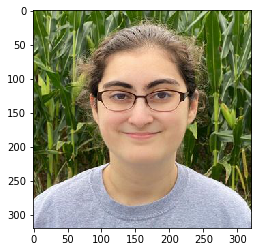

In [9]:
response = requests.get(profile_image, stream=True)
img=Image.open(response.raw)
plt.imshow(img)
plt.show()

👋Oh hey it's me 

Response that includes all of my playlists

In [10]:
playlists_endpoint_response = requests.get(PLAYLIST_LINK, headers=headers)

Listing out all non-private playlists

In [11]:
for playlist in playlists_endpoint_response.json()['items']:
    print(playlist['name'])

Sita's Post-2000 Songs
Sita's Pre-2000's Songs


Requesting playlist data

The Spotify API only grabs 100 songs at once from a playlist.  Since there are around 250 songs, all the data can be collected from three requests.

In [12]:
playlist_endpoint_response = requests.get(SPECIFIC_PLAYLIST_LINK, headers=headers)
playlist_endpoint_offset_response = requests.get(SPECIFIC_PLAYLIST_LINK_OFFSET, headers=headers)
playlist_endpoint_offset_response_200 = requests.get(SPECIFIC_PLAYLIST_LINK_OFFSET_200, headers=headers)

In [13]:
playlist_endpoint_response.json()['name']

"Sita's Pre-2000's Songs"

Checking data type of response

In [14]:
type(playlist_endpoint_response.json())

dict

Combining three playlist dictionaries by pushing into one array

In [15]:
playlist_all = []
playlist_all.append(playlist_endpoint_response.json()['tracks'])
playlist_all.append(playlist_endpoint_offset_response.json())
playlist_all.append(playlist_endpoint_offset_response_200.json())

### Album Release Dates

In [16]:
release_date=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        release_date.append(song['track']['album']['release_date'].split("-")[0])

In [17]:
release_df=pd.DataFrame(release_date,columns=['Release Dates'])
release_df

,Release Dates
0,1985
1,1985
2,1985
3,1987
4,1994
5,1994
6,1994
7,1982
8,1983
9,1988


In [18]:
unique_release_years=pd.DataFrame(release_df['Release Dates'].value_counts(), columns=['Release Dates']).sort_index()
unique_release_years

,Release Dates
1965,1
1969,1
1975,1
1976,1
1977,4
1978,3
1979,1
1980,9
1981,26
1982,35


In [19]:
unique_release_years.count()

Release Dates    40
dtype: int64

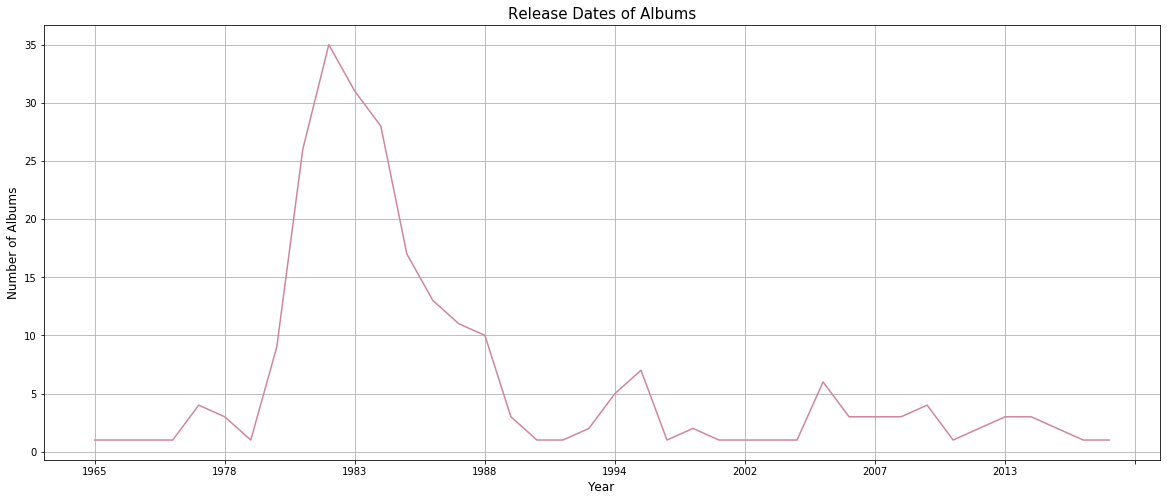

In [20]:
%matplotlib inline
unique_release_years.plot(kind='line', figsize=(20,8), color='#cf859f', legend=False)
plt.title("Release Dates of Albums", fontsize="15")
plt.xlabel("Year", fontsize="12")
plt.ylabel("Number of Albums", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

In [21]:
unique_release_years.loc[unique_release_years.index.values>'2000'].sum()

Release Dates    35
dtype: int64

The peak of the albums in this playlist seem to be from 1981-1984

The songs in this playlist I believe are mostly from before the 2000s.  However you see that there are around 35 that have release dates after the 2000s which is most likely because the song was remastered.

### Tracks in Album

In [22]:
tracks=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        tracks.append(song['track']['album']['total_tracks'])

In [23]:
track_df=pd.DataFrame(tracks,columns=['Number of Tracks'])

In [24]:
unique_track_df=pd.DataFrame(track_df['Number of Tracks'].value_counts(), columns=['Number of Tracks']).sort_index()
unique_track_df

,Number of Tracks
1,3
5,2
8,7
9,39
10,54
11,24
12,16
13,10
14,23
15,13


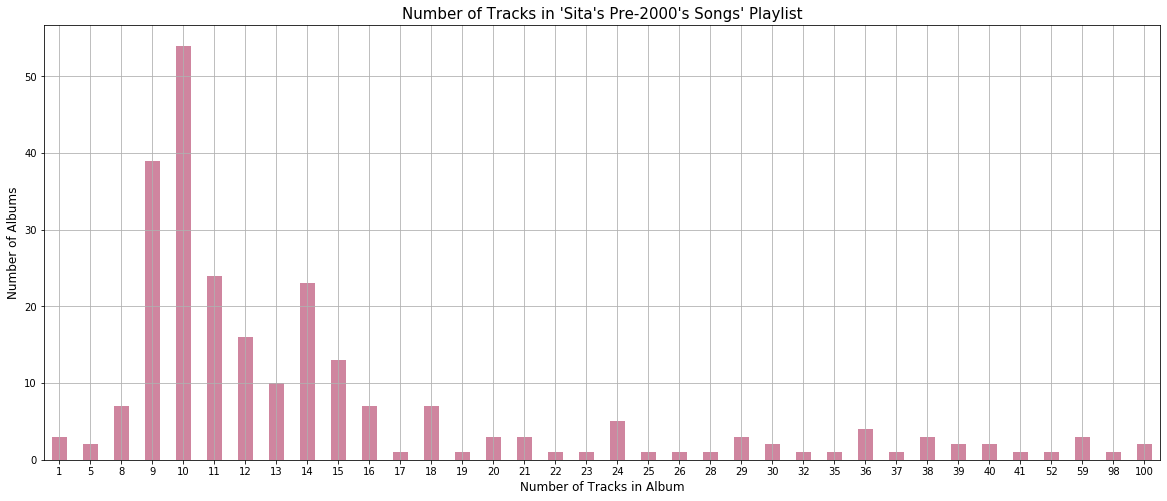

In [25]:
%matplotlib inline
unique_track_df.plot(kind='bar', figsize=(20,8), width=0.5, color='#cf859f', legend=False)
plt.title("Number of Tracks in 'Sita's Pre-2000's Songs' Playlist", fontsize="15")
plt.xlabel("Number of Tracks in Album", fontsize="12")
plt.ylabel("Number of Albums", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

The most number of albums seem to have tracks of 10, 9, 11 or 14.

### Specific Track Analysis

In [26]:
track_ids=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        track_ids.append(song['track']['id'])
        

In [27]:
track_audio_info=[]

for trackid in track_ids:
    track_audio_info.append(requests.get(BASE_URL+"audio-features/"+trackid, headers=headers).json())

In [28]:
track_audio_info_df=pd.DataFrame.from_dict(track_audio_info)
track_audio_info_df['duration_mins']=track_audio_info_df['duration_ms']/60000

In [29]:
track_names=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        track_names.append({'song': song['track']['name'], 'id': song['track']['id']})

In [30]:
track_name_df=pd.DataFrame.from_dict(track_names)

In [31]:
track_audio_info_names_df=pd.merge(track_name_df, track_audio_info_df, on='id')
track_audio_info_names_df

,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins
0,Take on Me,2WfaOiMkCvy7F5fcp2zZ8L,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.876,84.412,audio_features,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,225280,4,3.754667
1,Shout,0f798jZ9aYI34zo4lchKd0,0.510,0.931,0,-11.120,1,0.0423,0.185000,0.000014,0.1200,0.491,97.908,audio_features,spotify:track:0f798jZ9aYI34zo4lchKd0,https://api.spotify.com/v1/tracks/0f798jZ9aYI3...,https://api.spotify.com/v1/audio-analysis/0f79...,392676,4,6.544600
2,Everybody Wants To Rule The World,4RvWPyQ5RL0ao9LPZeSouE,0.645,0.795,7,-12.095,1,0.0527,0.347000,0.003890,0.1040,0.535,112.067,audio_features,spotify:track:4RvWPyQ5RL0ao9LPZeSouE,https://api.spotify.com/v1/tracks/4RvWPyQ5RL0a...,https://api.spotify.com/v1/audio-analysis/4RvW...,251489,4,4.191483
3,Nothing's Gonna Stop Us Now,2vEQ9zBiwbAVXzS2SOxodY,0.643,0.801,6,-4.921,1,0.0228,0.029800,0.000000,0.0719,0.534,95.988,audio_features,spotify:track:2vEQ9zBiwbAVXzS2SOxodY,https://api.spotify.com/v1/tracks/2vEQ9zBiwbAV...,https://api.spotify.com/v1/audio-analysis/2vEQ...,270333,4,4.505550
4,Vacation,1vJOi8S2MSq3jZsni1gm4x,0.547,0.753,4,-10.834,1,0.0296,0.002300,0.003470,0.1620,0.881,156.988,audio_features,spotify:track:1vJOi8S2MSq3jZsni1gm4x,https://api.spotify.com/v1/tracks/1vJOi8S2MSq3...,https://api.spotify.com/v1/audio-analysis/1vJO...,179027,4,2.983783
5,Head Over Heels,3rjONa9b7zc16b8nmXAuCG,0.552,0.722,2,-10.817,1,0.0388,0.000827,0.000024,0.1080,0.910,157.010,audio_features,spotify:track:3rjONa9b7zc16b8nmXAuCG,https://api.spotify.com/v1/tracks/3rjONa9b7zc1...,https://api.spotify.com/v1/audio-analysis/3rjO...,217440,4,3.624000
6,We Got The Beat - Single Mix,1ayIQqBm4PFbaine2OjgYO,0.596,0.949,1,-8.889,0,0.0356,0.049600,0.023100,0.0417,0.646,151.526,audio_features,spotify:track:1ayIQqBm4PFbaine2OjgYO,https://api.spotify.com/v1/tracks/1ayIQqBm4PFb...,https://api.spotify.com/v1/audio-analysis/1ayI...,151867,4,2.531117
7,Heat Of The Moment,2ZBalNGwjqdKJd29O76wBV,0.324,0.840,1,-7.310,1,0.0489,0.358000,0.000239,0.3670,0.576,136.136,audio_features,spotify:track:2ZBalNGwjqdKJd29O76wBV,https://api.spotify.com/v1/tracks/2ZBalNGwjqdK...,https://api.spotify.com/v1/audio-analysis/2ZBa...,227627,4,3.793783
8,Don't Cry,3rZLNPadgHyZ2ST4UgrsI1,0.363,0.867,0,-8.635,1,0.0563,0.200000,0.000001,0.1340,0.491,147.930,audio_features,spotify:track:3rZLNPadgHyZ2ST4UgrsI1,https://api.spotify.com/v1/tracks/3rZLNPadgHyZ...,https://api.spotify.com/v1/audio-analysis/3rZL...,210400,4,3.506667
9,Listen To Your Heart,78TnMTAFmWUWWCgNXR7D3K,0.539,0.583,1,-4.935,0,0.0275,0.108000,0.000000,0.1110,0.337,86.063,audio_features,spotify:track:78TnMTAFmWUWWCgNXR7D3K,https://api.spotify.com/v1/tracks/78TnMTAFmWUW...,https://api.spotify.com/v1/audio-analysis/78Tn...,328093,4,5.468217


Documentation for these columns are included in the [Spotify docs here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

### Track Danceability

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

In [32]:
track_audio_info_names_df['danceability'].describe()

count    250.000000
mean       0.619964
std        0.139352
min        0.193000
25%        0.540750
50%        0.629000
75%        0.716500
max        0.933000
Name: danceability, dtype: float64

Another One Bites The Dust has the highest Danceability score.

In [33]:
track_audio_info_names_df[['song','danceability']].sort_values(by='danceability').tail(1)

,song,danceability
34,Another One Bites The Dust - Remastered 2011,0.933


Lights has the lowest Danceability score.

In [34]:
track_audio_info_names_df[['song','danceability']].sort_values(by='danceability').head(1)

,song,danceability
29,Lights,0.193


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11afdbd10>]],
      dtype=object)

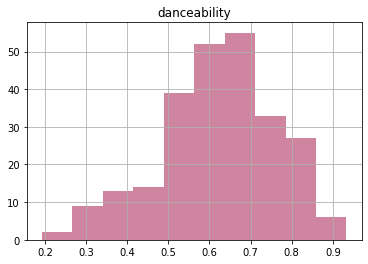

In [35]:
track_audio_info_names_df[['song','danceability']].hist(color=['#cf859f'])

### Track Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

In [36]:
track_audio_info_names_df['energy'].describe()

count    250.000000
mean       0.709592
std        0.171781
min        0.131000
25%        0.583500
50%        0.732000
75%        0.839000
max        0.991000
Name: energy, dtype: float64

Goody Two Shoes has the highest track energy score and Sweet Caroline has the lowest.

In [37]:
track_audio_info_names_df[['song','energy']].sort_values(by='energy').tail(1)

,song,energy
178,Goody Two Shoes,0.991


In [38]:
track_audio_info_names_df[['song','energy']].sort_values(by='energy').head(1)

,song,energy
90,Sweet Caroline,0.131


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1165d0>]],
      dtype=object)

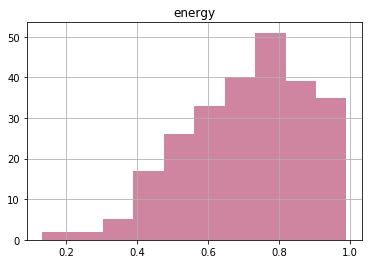

In [39]:
track_audio_info_names_df[['song','energy']].hist(color=['#cf859f'])

### Track Key

int	The estimated overall key of the track. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [94]:
track_audio_info_names_df['key'].describe()

count    250.000000
mean       5.084000
std        3.677368
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       11.000000
Name: key, dtype: float64

In [97]:
key_df=pd.DataFrame(track_audio_info_names_df['key'].value_counts())
key_df

,key
9,35
0,33
2,32
7,25
1,25
4,23
11,22
5,22
10,11
8,9


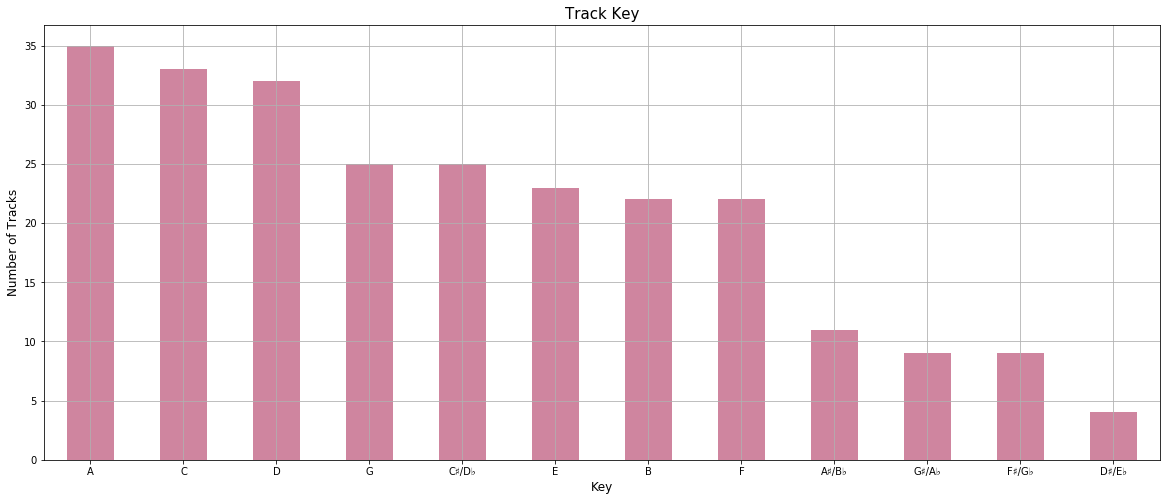

In [104]:
%matplotlib inline
key_df.plot(kind='bar', figsize=(20,8), width=0.5, color='#cf859f', legend=False)
plt.title("Track Key", fontsize="15")
plt.xlabel("Key", fontsize="12")
plt.ylabel("Number of Tracks", fontsize="12")
plt.xticks(np.arange(12),("A", "C", "D", "G", "C♯/D♭", "E", "B", "F", "A♯/B♭", "G♯/A♭", "F♯/G♭", "D♯/E♭"), rotation=0)
plt.grid()   
plt.show()

### Track Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [40]:
track_audio_info_names_df['speechiness'].describe()

count    250.000000
mean       0.045107
std        0.024924
min        0.022800
25%        0.032150
50%        0.036850
75%        0.048650
max        0.194000
Name: speechiness, dtype: float64

In [41]:
track_audio_info_names_df[['song','speechiness']].sort_values(by='speechiness').tail(1)

,song,speechiness
147,99 Red Balloons,0.194


In [42]:
track_audio_info_names_df[['song','speechiness']].sort_values(by='speechiness').head(1)

,song,speechiness
3,Nothing's Gonna Stop Us Now,0.0228


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1ef210>]],
      dtype=object)

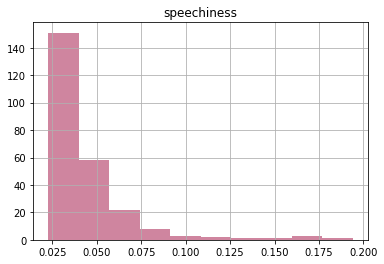

In [43]:
track_audio_info_names_df[['song','speechiness']].hist(color=['#cf859f'])

### Track Acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [44]:
track_audio_info_names_df['acousticness'].describe()

count    250.000000
mean       0.166812
std        0.174198
min        0.000364
25%        0.032550
50%        0.103500
75%        0.233500
max        0.658000
Name: acousticness, dtype: float64

In [45]:
track_audio_info_names_df[['song','acousticness']].sort_values(by='acousticness').tail(1)

,song,acousticness
84,Hold Me Now,0.658


In [46]:
track_audio_info_names_df[['song','acousticness']].sort_values(by='acousticness').head(1)

,song,acousticness
36,I Ran (So Far Away),0.000364


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3191d0>]],
      dtype=object)

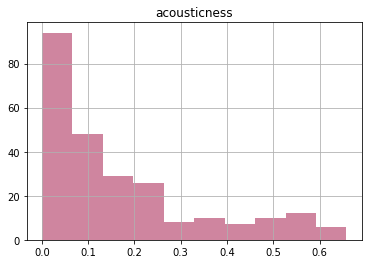

In [47]:
track_audio_info_names_df[['song','acousticness']].hist(color=['#cf859f'])

### Track Instrumentalness

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

In [48]:
track_audio_info_names_df['instrumentalness'].describe()

count    250.000000
mean       0.023250
std        0.102769
min        0.000000
25%        0.000001
50%        0.000050
75%        0.001373
max        0.939000
Name: instrumentalness, dtype: float64

In [49]:
track_audio_info_names_df[['song','instrumentalness']].sort_values(by='instrumentalness').tail(1)

,song,instrumentalness
174,Miserlou,0.939


In [50]:
track_audio_info_names_df[['song','instrumentalness']].sort_values(by='instrumentalness').head(1)

,song,instrumentalness
124,Centerfold,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3e9790>]],
      dtype=object)

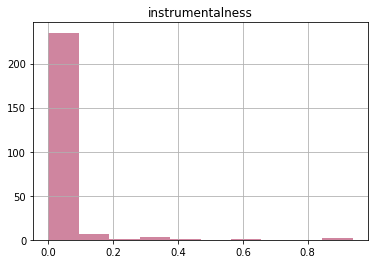

In [51]:
track_audio_info_names_df[['song','instrumentalness']].hist(color=['#cf859f'])

### Track Liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [52]:
track_audio_info_names_df['liveness'].describe()

0.16386480000000006

In [53]:
track_audio_info_names_df[['song','liveness']].sort_values(by='liveness').tail(1)

,song,liveness
146,Love Shack,0.851


In [54]:
track_audio_info_names_df[['song','liveness']].sort_values(by='liveness').head(1)

,song,liveness
226,She Drives Me Crazy,0.0307


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac22590>]],
      dtype=object)

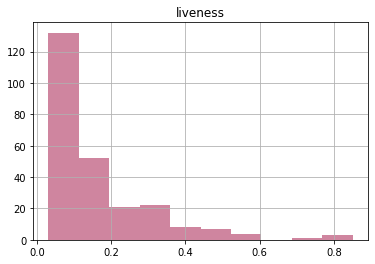

In [55]:
track_audio_info_names_df[['song','liveness']].hist(color=['#cf859f'])

### Track Valence

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [56]:
track_audio_info_names_df['valence'].describe()

0.6769760000000008

In [57]:
track_audio_info_names_df[['song','valence']].sort_values(by='valence').tail(1)

,song,valence
197,She Works Hard For The Money,0.984


In [58]:
track_audio_info_names_df[['song','valence']].sort_values(by='valence').head(1)

,song,valence
238,The Search Is Over,0.148


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a589d50>]],
      dtype=object)

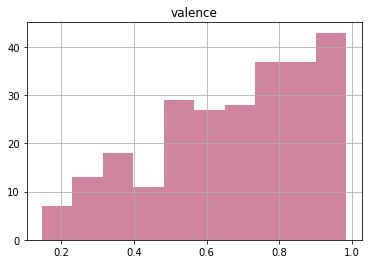

In [59]:
track_audio_info_names_df[['song','valence']].hist(color=['#cf859f'])

### Track Tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

In [60]:
track_audio_info_names_df['tempo'].describe()

125.16433599999998

In [61]:
track_audio_info_names_df[['song','tempo']].sort_values(by='tempo').tail(1)

,song,tempo
162,Missing You,208.571


In [62]:
track_audio_info_names_df[['song','tempo']].sort_values(by='tempo').head(1)

,song,tempo
90,Sweet Caroline,63.071


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac52b10>]],
      dtype=object)

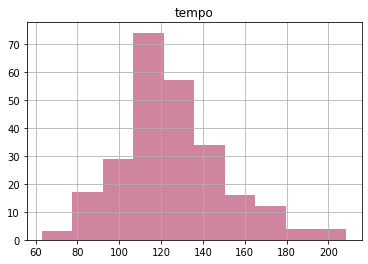

In [63]:
track_audio_info_names_df[['song','tempo']].hist(color=['#cf859f'])

### Track Duration

The average song duration is around 4 minutes

In [64]:
track_audio_info_names_df['duration_mins'].describe()

4.168222866666666

The longest track is around 7 minutes and is the "Twilight Zone"

In [65]:
track_audio_info_names_df[['song','duration_mins']].sort_values(by='duration_mins').tail(1)

,song,duration_mins
214,Twilight Zone,7.907783


In [66]:
track_audio_info_names_df[['song','duration_mins']].sort_values(by='duration_mins').head(1)

,song,duration_mins
174,Miserlou,2.254883


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a54edd0>]],
      dtype=object)

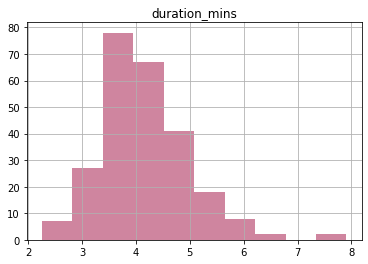

In [67]:
track_audio_info_names_df[['song','duration_mins']].hist(color=['#cf859f'])

### Time Signature of Tracks

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [68]:
time_signature_df=pd.DataFrame(track_audio_info_names_df['time_signature'].value_counts())

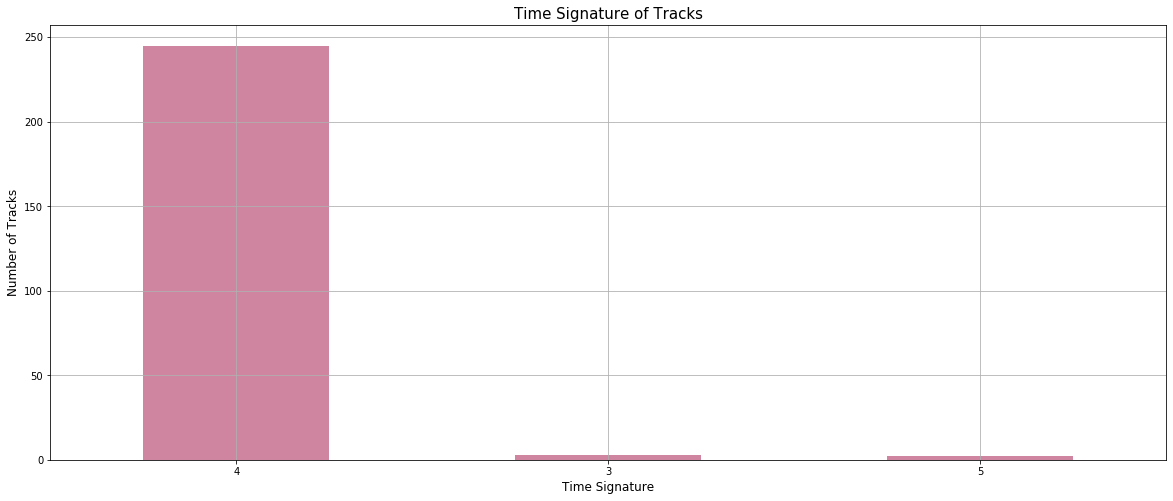

In [69]:
%matplotlib inline
time_signature_df.plot(kind='bar', figsize=(20,8), width=0.5, color='#cf859f', legend=False)
plt.title("Time Signature of Tracks", fontsize="15")
plt.xlabel("Time Signature", fontsize="12")
plt.ylabel("Number of Tracks", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

### Track Mode

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [70]:
mode_df=pd.DataFrame(track_audio_info_names_df['mode'].value_counts())
mode_df

,mode
1,184
0,66


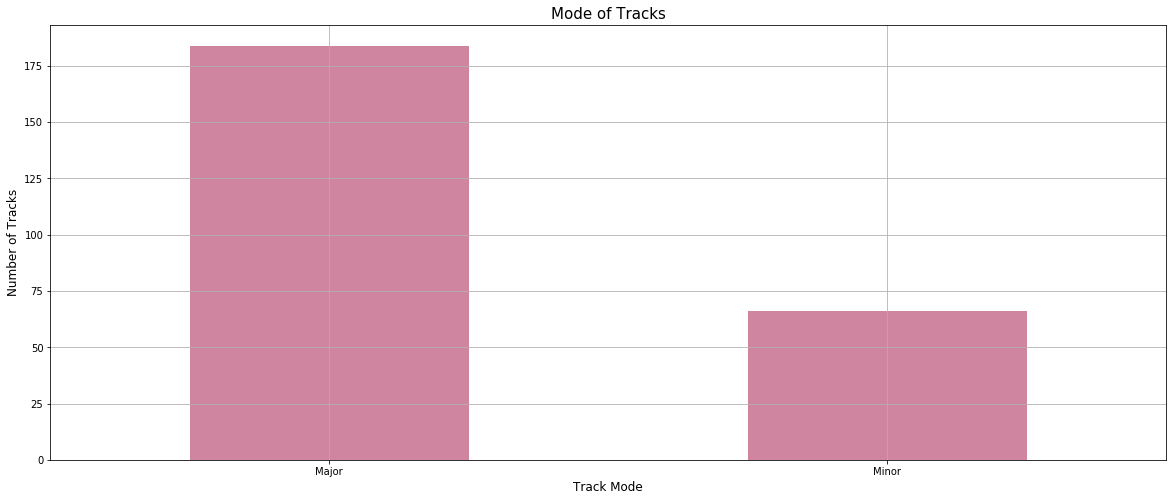

In [71]:
%matplotlib inline
mode_df.plot(kind='bar', figsize=(20,8), width=0.5, color=['#cf859f'], legend=False)
plt.title("Mode of Tracks", fontsize="15")
plt.xlabel("Track Mode", fontsize="12")
plt.ylabel("Number of Tracks", fontsize="12")
plt.xticks(np.arange(2),("Major", "Minor"), rotation=0)
plt.grid()   
plt.show()

Most of the tracks are in major mode.

### Date Song Added To Playlist

In [72]:
date_added=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        date_added.append(song['added_at'].split("-")[0])

In [73]:
added_df=pd.DataFrame(date_added,columns=['Date Added'])

In [74]:
unique_added_years=pd.DataFrame(added_df['Date Added'].value_counts(), columns=['Date Added']).sort_index()
unique_added_years

,Date Added
2016,73
2017,4
2018,20
2019,13
2020,140


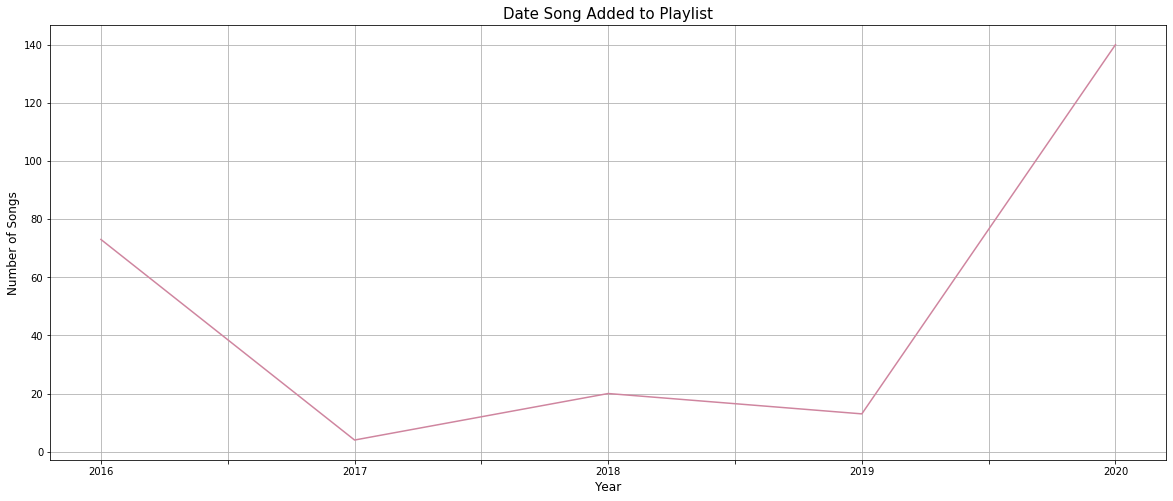

In [75]:
%matplotlib inline
unique_added_years.plot(kind='line', figsize=(20,8), color='#cf859f', legend=False)
plt.title("Date Song Added to Playlist", fontsize="15")
plt.xlabel("Year", fontsize="12")
plt.ylabel("Number of Songs", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

Most of the songs were added to the playlist in 2020 and 2016.  There is a drop in between those years.  

### Popular Albums in Playlist

In [76]:
albums=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        albums.append(song['track']['album']['name'])

In [77]:
albums=pd.DataFrame(albums,columns=['Albums'])

In [78]:
unique_albums=pd.DataFrame(albums['Albums'].value_counts(), columns=['Albums'])
unique_albums

,Albums
Return To The Valley Of The Go-Go's,4
Heartbeat City,3
Vital Signs,3
The Essential Michael Jackson,3
Born In The U.S.A.,3
The Hits,3
Escape,3
The Definitive Collection,2
Thriller 25 Super Deluxe Edition,2
Ultimate Collection,2


There are 208 unique albums

In [79]:
unique_albums['Albums'].count()

208

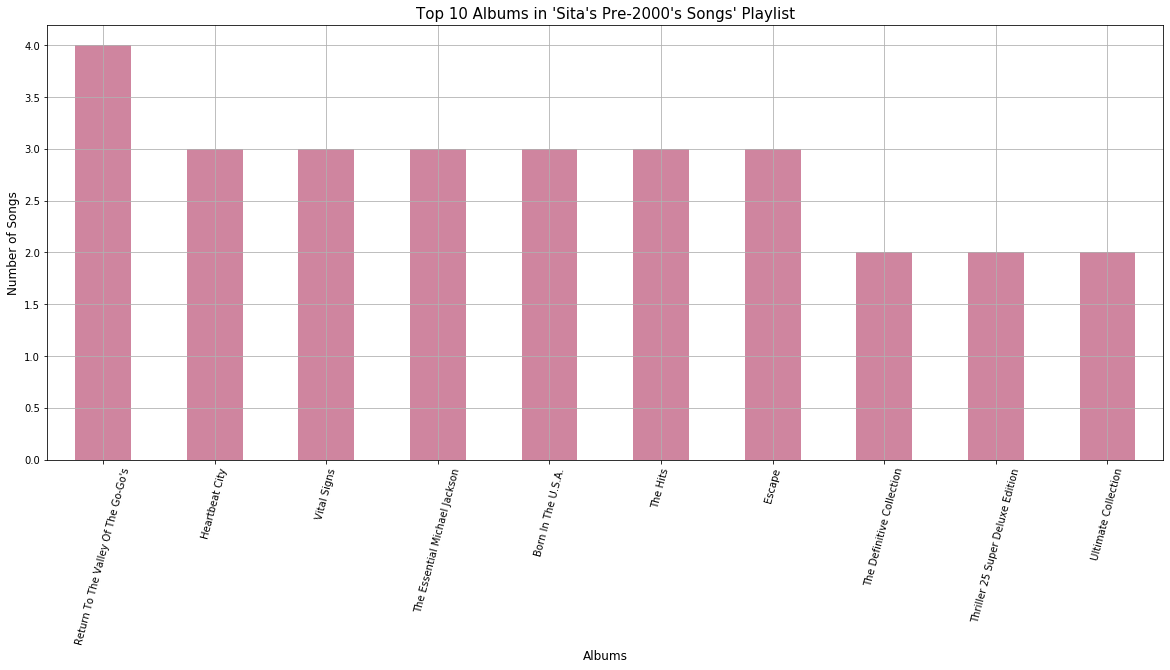

In [80]:
%matplotlib inline
unique_albums[0:10].plot(kind='bar', figsize=(20,8), width=0.5, color='#cf859f', legend=False)
plt.title("Top 10 Albums in 'Sita's Pre-2000's Songs' Playlist", fontsize="15")
plt.xlabel("Albums", fontsize="12")
plt.ylabel("Number of Songs", fontsize="12")
plt.xticks(rotation=75)
plt.grid()   
plt.show()

The most songs are from the album Return To the Valley Of The Go-Go's

In [81]:
unique_albums.loc[unique_albums['Albums']<2].sum()

Albums    174
dtype: int64

In [82]:
unique_albums.loc[unique_albums['Albums']>2].sum()

Albums    22
dtype: int64

There are a large number of songs (173) in the playlist that are the only song within an album.  For the other songs in the playlist there are 22 that share an album with some other song.

### Songs in the Playlist

In [83]:
songs=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        songs.append(song['track']['name'])

In [84]:
songs=pd.DataFrame(songs,columns=['Songs'])
songs

,Songs
0,Take on Me
1,Shout
2,Everybody Wants To Rule The World
3,Nothing's Gonna Stop Us Now
4,Vacation
5,Head Over Heels
6,We Got The Beat - Single Mix
7,Heat Of The Moment
8,Don't Cry
9,Listen To Your Heart


Quick Duplicate Check

In [85]:
songs['Songs'].duplicated().sum()

0

Checking number of elements.  This counts the 0 index element as well

In [86]:
songs['Songs'].count()

250

### Artists in Playlist

In [87]:
artists=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        for artist in song['track']['artists']:
            artists.append(artist['name'])

In [88]:
artists_not_unique=pd.DataFrame(artists,columns=['Artists'])

In [89]:
unique_artists=pd.DataFrame(artists_not_unique['Artists'].value_counts(), columns=['Artists'])
unique_artists

,Artists
Eddie Money,7
Michael Jackson,7
Journey,7
Survivor,6
Daryl Hall & John Oates,6
Huey Lewis & The News,5
Rick Springfield,5
REO Speedwagon,5
The Cars,5
Men At Work,4


There are 152 unique artists in the playlist

In [90]:
unique_artists['Artists'].count()

152

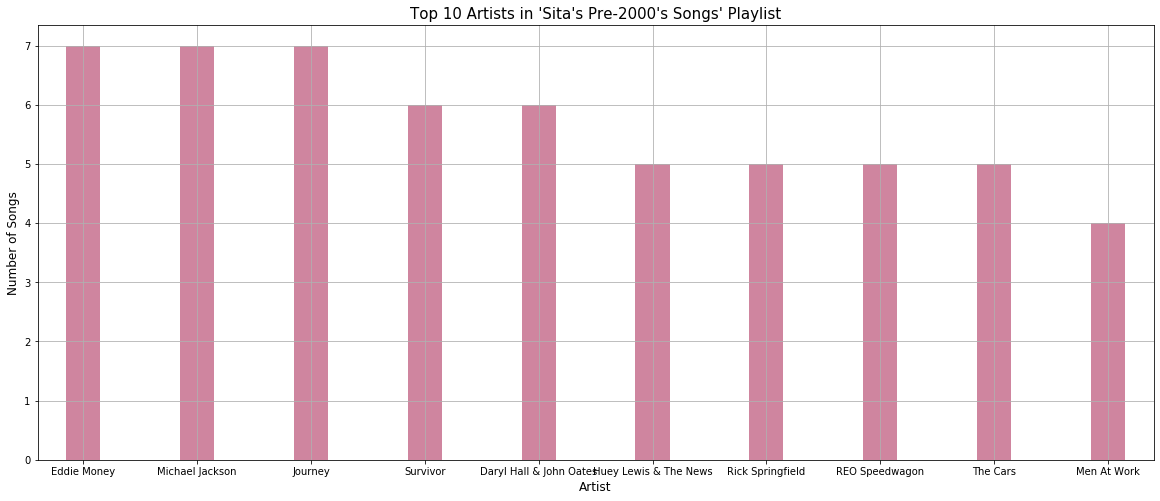

In [91]:
%matplotlib inline
unique_artists[0:10].plot(kind='bar', figsize=(20,8), width=0.3, color='#cf859f', legend=False)
plt.title("Top 10 Artists in 'Sita's Pre-2000's Songs' Playlist", fontsize="15")
plt.xlabel("Artist", fontsize="12")
plt.ylabel("Number of Songs", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

The top artists in my playlist are Journey, Eddie Money, Michael Jackson, Daryl Hall & John Oates, and Survivor. 

### Playlist Cover Art

In [92]:
image_response = requests.get(PLAYLIST_IMAGE_LINK, headers=headers)
image=image_response.json()[0]['url']

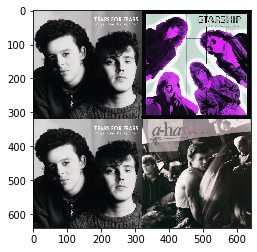

In [93]:
response = requests.get(image, stream=True)
img=Image.open(response.raw)
plt.imshow(img)
plt.show()

### References 

Docs
* https://developer.spotify.com/console/playlists/
* https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Playlist
* https://open.spotify.com/playlist/3b6hKzYzFpCKxipAz3pAvr
